#    Extrace data

In [191]:
# Imports

import matplotlib.pyplot as plt
import pandas  as pd
import seaborn as sns

# Style
sns.set_style('darkgrid')

# Import EXCEL file with all sheets
path = r'C:\Users\97250\Desktop\studied\R ,python\InstaScraping_afterManipulation.xlsx'

file = pd.read_excel(path, sheet_name= None)

sheets = [i for i in file]
len(sheets)

16

In [192]:
sheets

['2020-10-30',
 '2020-10-31',
 '2020-11-01',
 '2020-11-02',
 '2020-11-03',
 '2020-11-04',
 '2020-11-05',
 '2020-11-06',
 '2020-11-07',
 '2020-11-08',
 '2020-11-09',
 '2020-11-10',
 '2020-11-11',
 '2020-11-12',
 '2020-11-13',
 '2020-11-14']

# Transpose

In [193]:
##Check if all dates are consistent

for i in range(len(sheets)-1):
    
    a = int(sheets[i][-2:])
    b = int(sheets[i+1][-2:])
    if b-a>1:
        raise UnMatchedDates 
    

In [194]:
#converter function


def convertor(x):
    
    def remover(x):
        x = x.replace('k','').replace('m','').replace(',','')
        return float(x)
    
    x = str(x)
    
    if 'k' in x:
        return int(remover(x)*1000)
        
    if 'm' in x:
        return int(remover(x)*1000000)
    
    else:
        return int(remover(x))



In [195]:
for i in sheets:
    sheet = file[i]
    for j in sheet.columns[1:]:
        sheet[j] = sheet[j].apply(convertor)

## Initialize 

In [196]:
index ='person'
m = 0      # model number from the list
model  = file[sheets[-1]][index][m]   # = 'melniekroll'

#columns to check
column = 'followers'

# I took the last sheet cause all models are in there.
initializeSheet = sheets[-1] 

### Creats Time Series table of the the given 'column'.

In [197]:
# Initialize data
data = file[sheets[-1]][[index,column]]

In [198]:
#fill the table with the specified column
for i in sheets:
    current_data = file[i][[index,column]]
    data = data.merge(current_data, on=index,how = 'left')

In [199]:
#set country as index
data.set_index(index,inplace=True)

In [200]:
# Arrange Dates

arrangedDate =  lambda x: '-'.join(x.split('-')[::-1])
sheets = [arrangedDate(i) for i in file]

In [201]:
#set column names to the reported dates

sheets.insert(0,'1')

data.columns = sheets

data.drop('1',axis=1,inplace=True)

In [202]:
sheets = [arrangedDate(i) for i in file]

In [203]:
data.fillna(0,inplace=True)

In [204]:
data

,30-10-2020,31-10-2020,01-11-2020,02-11-2020,03-11-2020,04-11-2020,05-11-2020,06-11-2020,07-11-2020,08-11-2020,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020
person,,,,,,,,,,,,,,,,
melaniekroll,172000.0,176000.0,179000.0,180000.0,182000.0,184000.0,187000.0,191000.0,195000.0,198000.0,201000.0,203000,205000,207000,208000,209000
leelevi,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000,147000,146000,146000,146000
margauxdietz,405000.0,405000.0,406000.0,406000.0,405000.0,405000.0,406000.0,406000.0,406000.0,406000.0,406000.0,406000,406000,405000,405000,405000
hollyjboo,0.0,0.0,0.0,0.0,51500.0,51500.0,51500.0,51500.0,51500.0,51500.0,51500.0,51500,51500,51400,51400,51400
neleburgemstr,36500.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600,36600,36600,36600,36600
annabelsmitt,136000.0,136000.0,136000.0,136000.0,136000.0,137000.0,137000.0,137000.0,137000.0,137000.0,137000.0,138000,138000,138000,138000,139000
franziskakch,0.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000,131000,131000,131000,131000
juliehocke,0.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,116000.0,116000.0,116000,116000,116000,116000,116000
elletrowbridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242000,242000,243000,243000,243000


In [205]:
selectedData = data.loc[model]

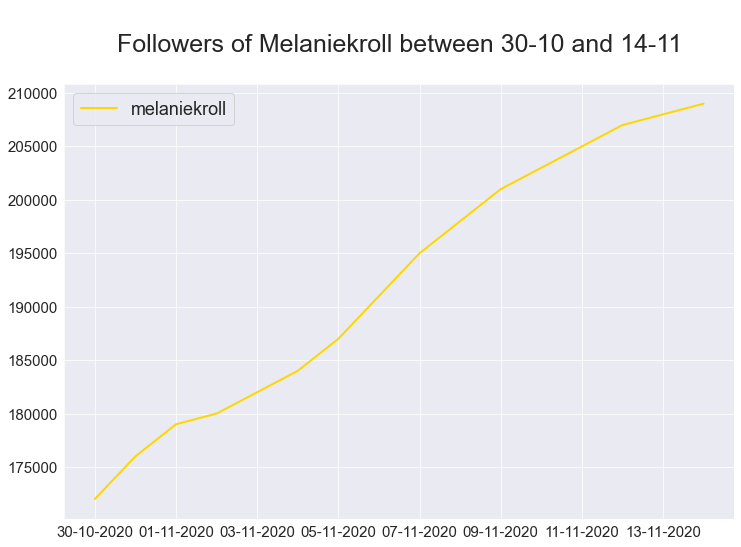

In [206]:
###  Plot graphs throuthout time

firstDate,lastDate = sheets[0],sheets[-1]
title = "\n"+ column.capitalize() +" of "+ model.capitalize() + " between " + firstDate[:-5] + " and " + lastDate[:-5]+ "\n"

selectedData.transpose().plot(lw = 2,figsize=(12,8), fontsize=15,color='gold')
plt.legend(loc='upper left',prop={'size':18})
plt.title(title,fontsize=25)
plt.locator_params(nbins=11)
plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Scrpaing\Outputs\''+column.capitalize()+' of ' +model.capitalize()+'.png')


In [207]:
data2      = []
beginSheet = -1
endSheet   =  1

for i in data.drop(['miss_gemma_fied','lylianawray','hollyjboo','melissa_ran','elletrowbridge','gracey_hodge','adi_hashamonai','shirifineman']).index:
    currentModel = data.loc[i]
    difference   = currentModel[beginSheet]-currentModel[endSheet]
    data2.append([i,difference])   

In [208]:
duration = len(sheets) - endSheet

col2 = 'Difference within {} days'.format(duration)

data2 = pd.DataFrame(data2,columns=['model',col2]).set_index('model')

In [209]:
data2.sort_values(by = col2 ,ascending = False)

,Difference within 15 days
model,
melaniekroll,33000.0
marion.pascale,6000.0
annabelsmitt,3000.0
juliehocke,1000.0
charleenweiss,1000.0
talya_naftali,8.0
margauxdietz,0.0
neleburgemstr,0.0
franziskakch,0.0


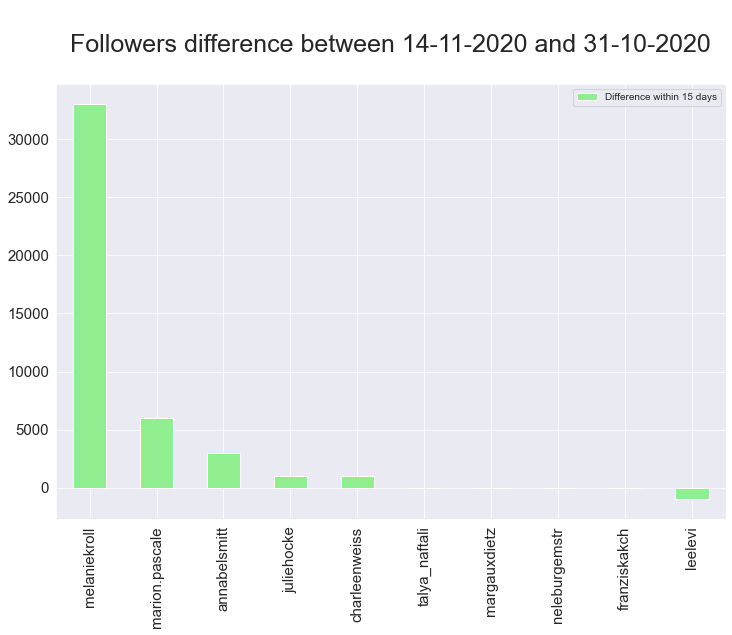

In [210]:

# Prepare vriables
firstDate, lastDate = data.columns[beginSheet],data.columns[endSheet]
title = "\n"+ column.capitalize() +" difference between " + firstDate + " and " + lastDate + "\n"

#plot
data2.sort_values(by = col2 ,ascending = False).plot.bar(figsize=(12,8), fontsize=15,color='lightgreen')
plt.title(title,fontsize=25)
plt.locator_params(nbins=11)
plt.xlabel('')
plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Scrpaing\Outputs\''+column.capitalize()+'deiffernce of 10 models.png')


In [211]:
###     Prepare data3 -allModels on time line

data3 = data.drop(['hollyjboo','melissa_ran','lylianawray','talya_naftali','miss_gemma_fied'])
data3 = data3.drop(data.columns[0],axis=1)
data3 = data3.transpose()

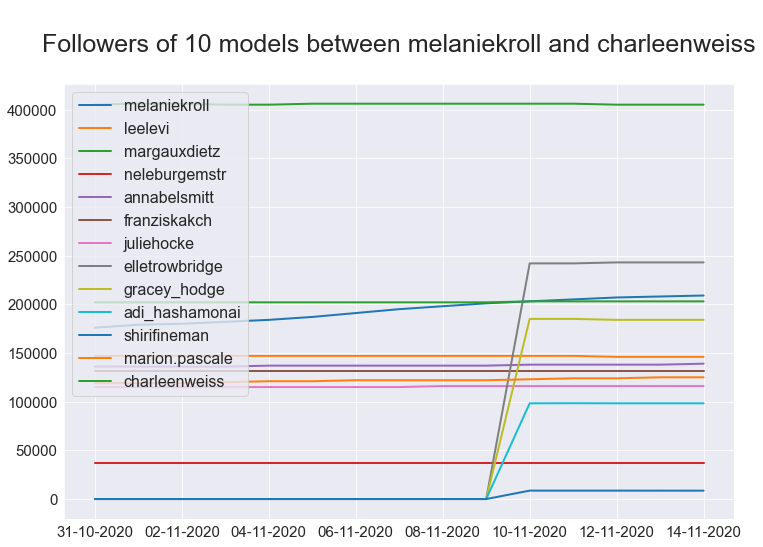

In [212]:
firstDate,lastDate = data3.columns[0],data3.columns[-1]
title = "\n"+ column.capitalize() +" of 10 models between " + firstDate + " and " + lastDate + "\n"

data3.plot(lw = 2,figsize=(12,8), fontsize=15)
plt.legend(loc='upper left',prop={'size':16})
plt.title(title,fontsize=25)
plt.locator_params(nbins=11)
plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Scrpaing\Outputs\''+column.capitalize()+' of 10 models.png')

### 

In [213]:
data

,30-10-2020,31-10-2020,01-11-2020,02-11-2020,03-11-2020,04-11-2020,05-11-2020,06-11-2020,07-11-2020,08-11-2020,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020
person,,,,,,,,,,,,,,,,
melaniekroll,172000.0,176000.0,179000.0,180000.0,182000.0,184000.0,187000.0,191000.0,195000.0,198000.0,201000.0,203000,205000,207000,208000,209000
leelevi,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000.0,147000,147000,146000,146000,146000
margauxdietz,405000.0,405000.0,406000.0,406000.0,405000.0,405000.0,406000.0,406000.0,406000.0,406000.0,406000.0,406000,406000,405000,405000,405000
hollyjboo,0.0,0.0,0.0,0.0,51500.0,51500.0,51500.0,51500.0,51500.0,51500.0,51500.0,51500,51500,51400,51400,51400
neleburgemstr,36500.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600.0,36600,36600,36600,36600,36600
annabelsmitt,136000.0,136000.0,136000.0,136000.0,136000.0,137000.0,137000.0,137000.0,137000.0,137000.0,137000.0,138000,138000,138000,138000,139000
franziskakch,0.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000.0,131000,131000,131000,131000,131000
juliehocke,0.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,116000.0,116000.0,116000,116000,116000,116000,116000
elletrowbridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242000,242000,243000,243000,243000


In [214]:
firstDate,lastDate = sheets[0],sheets[-1]

In [215]:
plotData = data[lastDate].sort_values(ascending=False)   #

Text(0.5, 0, '')

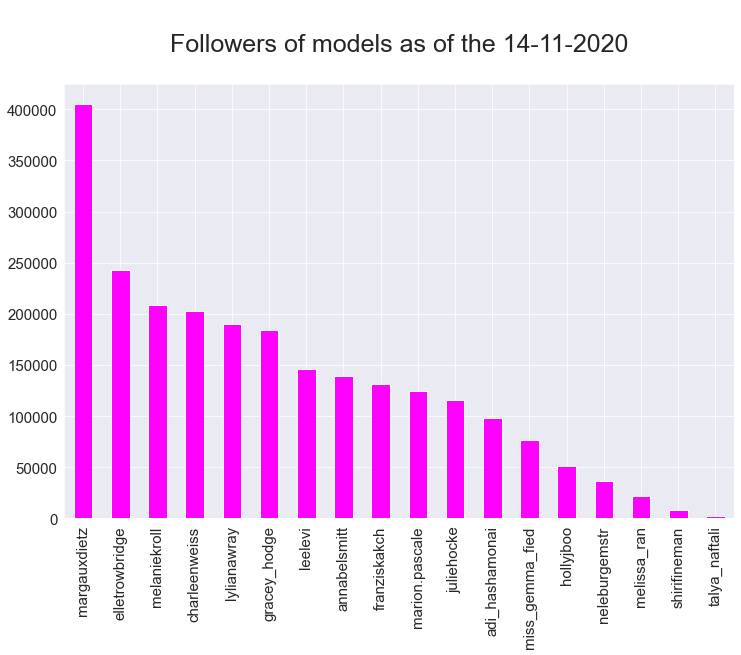

In [216]:
plotData.plot.bar(figsize=(12,8), fontsize=15,color='magenta')

title = "\n"+ column.capitalize() +" of models as of the " + lastDate + "\n"
plt.title(title,fontsize=25)
##plt.locator_params(nbins=11)
plt.xlabel('')
##plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Scrpaing\Outputs\''+column.capitalize()+' of models.png')
